# ______________Task 1 IRIS FLOWER CLASSIFICATION ______________

In [2]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 70.9/70.9 MB 1.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


# Importing Libraries:

In [39]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [4]:
from IPython.display import HTML

image_url = 'https://editor.analyticsvidhya.com/uploads/51518iris%20img1.png'
centered_image = f'''
    <div style="display: flex; justify-content: center;">
        <img src="{image_url}" width="500" />
    </div>
'''
display(HTML(centered_image))



# Loading Dataset:

In [5]:
df = pd.read_csv('Iris.csv')
df_copy=df.copy()
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Preprocessing:

**Histogram**

array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'SepalLengthCm'}>],
       [<AxesSubplot:title={'center':'SepalWidthCm'}>,
        <AxesSubplot:title={'center':'PetalLengthCm'}>],
       [<AxesSubplot:title={'center':'PetalWidthCm'}>, <AxesSubplot:>]],
      dtype=object)

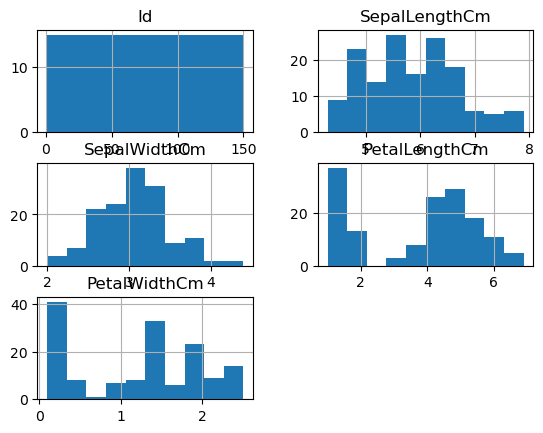

In [6]:
df_copy.hist()

**Pairplot**

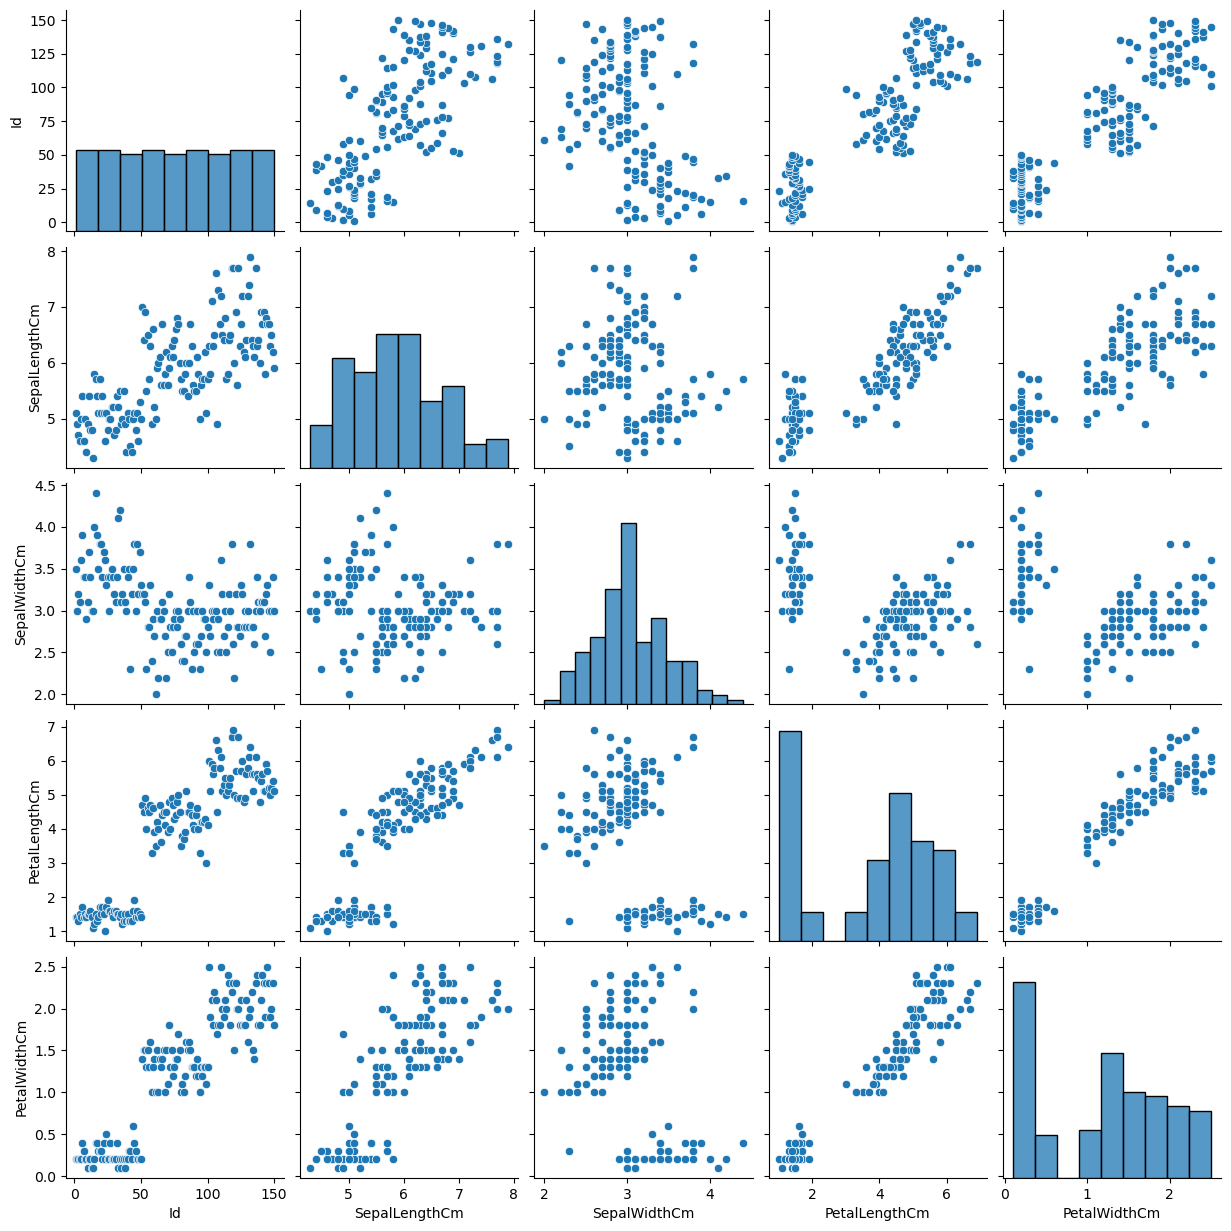

In [7]:
print(sns.pairplot(df_copy))

# Displaying a concise summary of information about the DataFrame:

In [8]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
df_copy.drop(columns=['Id'],axis=0,inplace=True)

In [10]:
df_copy.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Checking the number of rows and columns

In [11]:
df_copy.shape
print('Rows    ---->',df.shape[0])
print('Columns ---->',df.shape[1])

Rows    ----> 150
Columns ----> 6


In [21]:
df_copy.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
df_copy.columns = ['sl','sw','pl','pw','species']
df_split_iris=df_copy.species.str.split('-',n=-1,expand=True) #Remove prefix 'Iris-' from species col
df_split_iris.drop(columns=0,axis=1,inplace=True)#Drop 'Iris-' col
df_split_iris

,1
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [13]:
df3_full=df_copy.join(df_split_iris)
df3_full

,sl,sw,pl,pw,species,1
0,5.1,3.5,1.4,0.2,Iris-setosa,setosa
1,4.9,3.0,1.4,0.2,Iris-setosa,setosa
2,4.7,3.2,1.3,0.2,Iris-setosa,setosa
3,4.6,3.1,1.5,0.2,Iris-setosa,setosa
4,5.0,3.6,1.4,0.2,Iris-setosa,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,virginica
146,6.3,2.5,5.0,1.9,Iris-virginica,virginica
147,6.5,3.0,5.2,2.0,Iris-virginica,virginica
148,6.2,3.4,5.4,2.3,Iris-virginica,virginica


In [14]:
df3_full.rename({1:'species1'},axis=1,inplace=True) #Rename column
df3_full

,sl,sw,pl,pw,species,species1
0,5.1,3.5,1.4,0.2,Iris-setosa,setosa
1,4.9,3.0,1.4,0.2,Iris-setosa,setosa
2,4.7,3.2,1.3,0.2,Iris-setosa,setosa
3,4.6,3.1,1.5,0.2,Iris-setosa,setosa
4,5.0,3.6,1.4,0.2,Iris-setosa,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,virginica
146,6.3,2.5,5.0,1.9,Iris-virginica,virginica
147,6.5,3.0,5.2,2.0,Iris-virginica,virginica
148,6.2,3.4,5.4,2.3,Iris-virginica,virginica


In [15]:
df3_full.drop(columns='species',axis=1,inplace=True)

In [16]:
df3_full

,sl,sw,pl,pw,species1
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [17]:
df3_full.shape

(150, 5)

In [18]:
df3_full.isna() 

,sl,sw,pl,pw,species1
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [25]:
df3_full.corr()

,sl,sw,pl,pw
sl,1.000000,-0.109369,0.871754,0.817954
sw,-0.109369,1.000000,-0.420516,-0.356544
pl,0.871754,-0.420516,1.000000,0.962757
pw,0.817954,-0.356544,0.962757,1.000000


In [26]:
df3_full.describe()

,sl,sw,pl,pw
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [87]:
df.groupby("Species").size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

# Data Visualisation

**Violin Plot** **:A violin plot is a type of data visualization that combines aspects of box plots and kernel density plots.**

<AxesSubplot:xlabel='species1', ylabel='sw'>

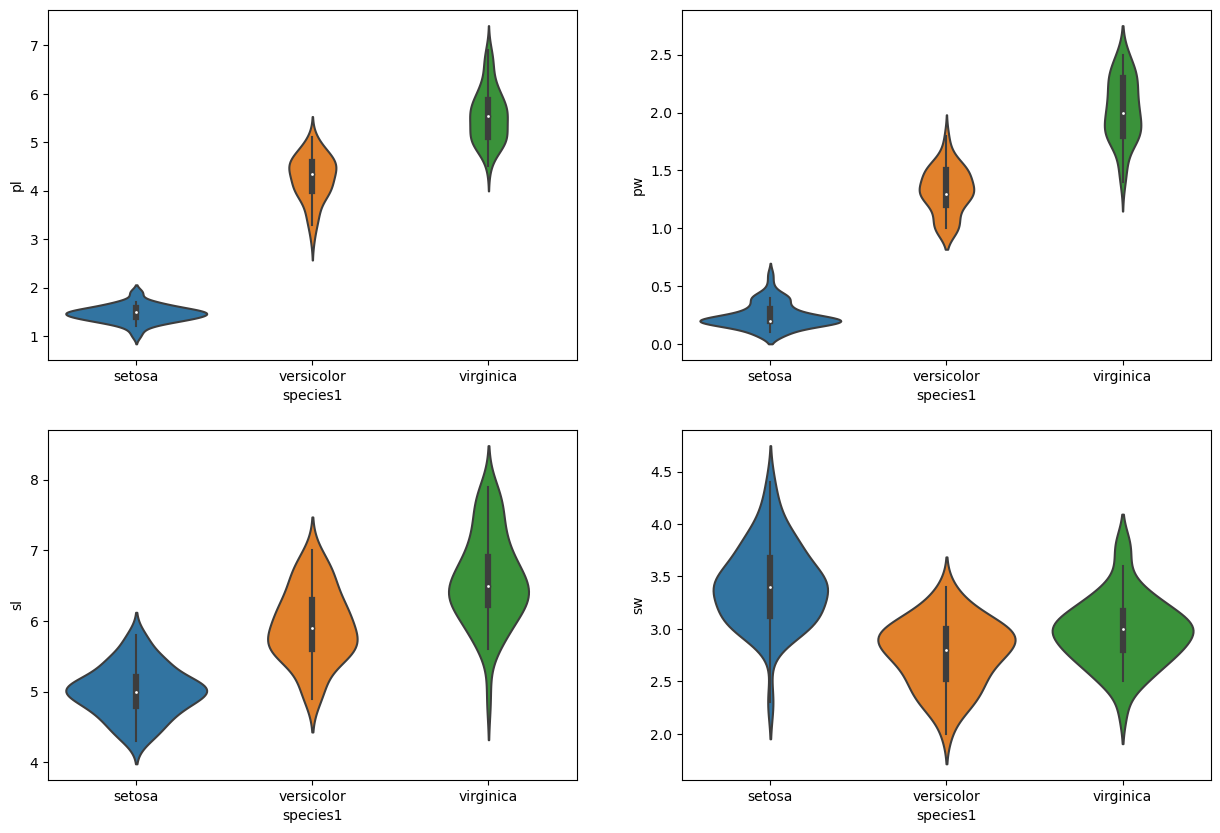

In [28]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='species1',y='pl',data=df3_full)
plt.subplot(2,2,2)
sns.violinplot(x='species1',y='pw',data=df3_full)
plt.subplot(2,2,3)
sns.violinplot(x='species1',y='sl',data=df3_full)
plt.subplot(2,2,4)
sns.violinplot(x='species1',y='sw',data=df3_full)

 **DISTRIBUTION PLOT(dist plot):** ***It provides insights into the underlying probability distribution of the data, showing the frequency or density of different values in a continuous or discrete dataset.***

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pl', ylabel='Density'>

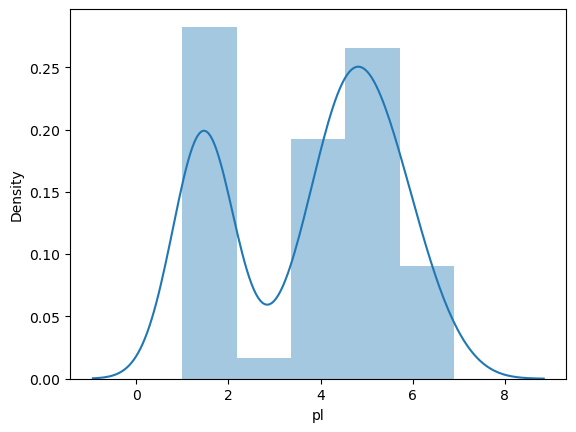

In [36]:
sns.distplot(df3_full.pl)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sl', ylabel='Density'>

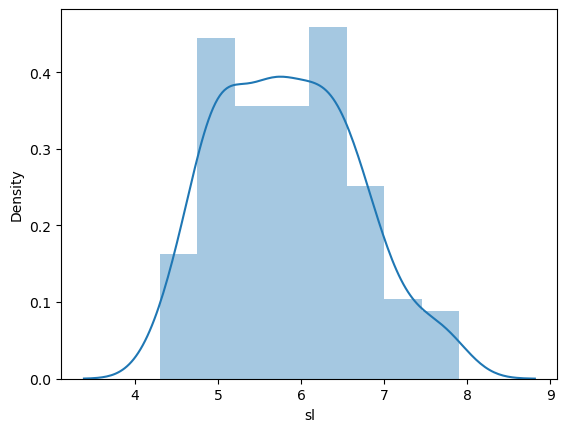

In [37]:
sns.distplot(df3_full.sl)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pw', ylabel='Density'>

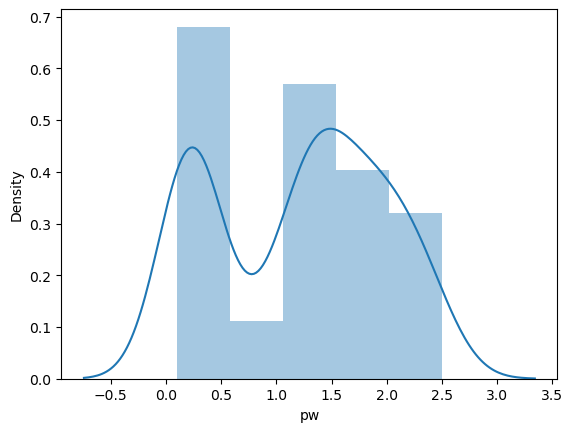

In [39]:
sns.distplot(df3_full.pw)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sw', ylabel='Density'>

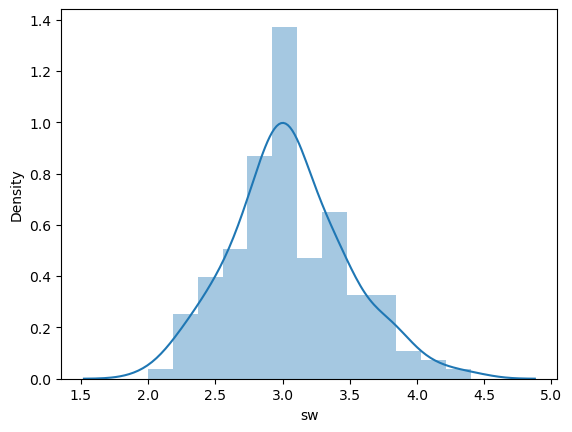

In [40]:
sns.distplot(df3_full.sw)

**Scatter Plot :** ***Is a visualization that displays individual data points as dots on a two-dimensional plane. Scatter plots are commonly used to show the relationship between two numerical variables, allowing you to observe patterns, correlations, clusters, or outliers in the data.***

<AxesSubplot:xlabel='sw', ylabel='pl'>

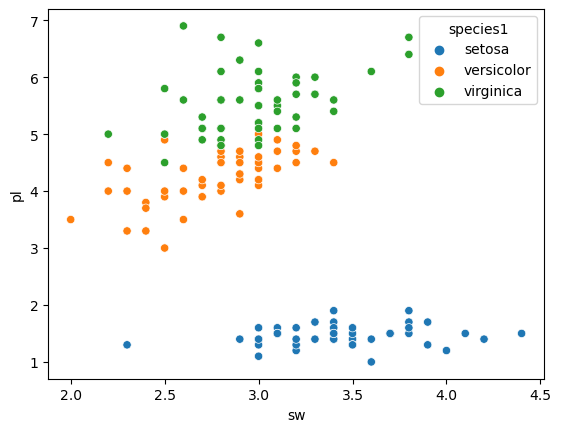

In [27]:
sns.scatterplot(x=df3_full.sw,y=df3_full.pl,hue=df3_full.species1)

**CORRELATION MATRIX:*A correlation matrix is a tabular representation that shows the correlation coefficients between a set of variables***

Correlation Matrix:


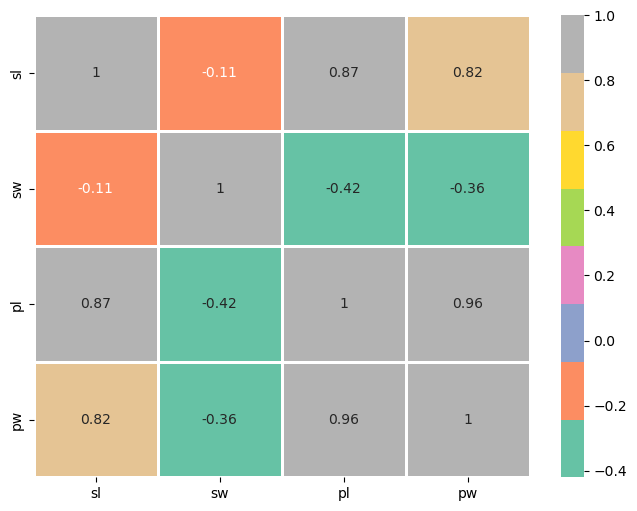

In [91]:
plt.subplots(figsize=(8,6))
sns.heatmap(df3_full.corr(),annot=True,cmap="Set2",linewidths=2) 
print("Correlation Matrix:")
plt.show()

<Figure size 640x480 with 0 Axes>

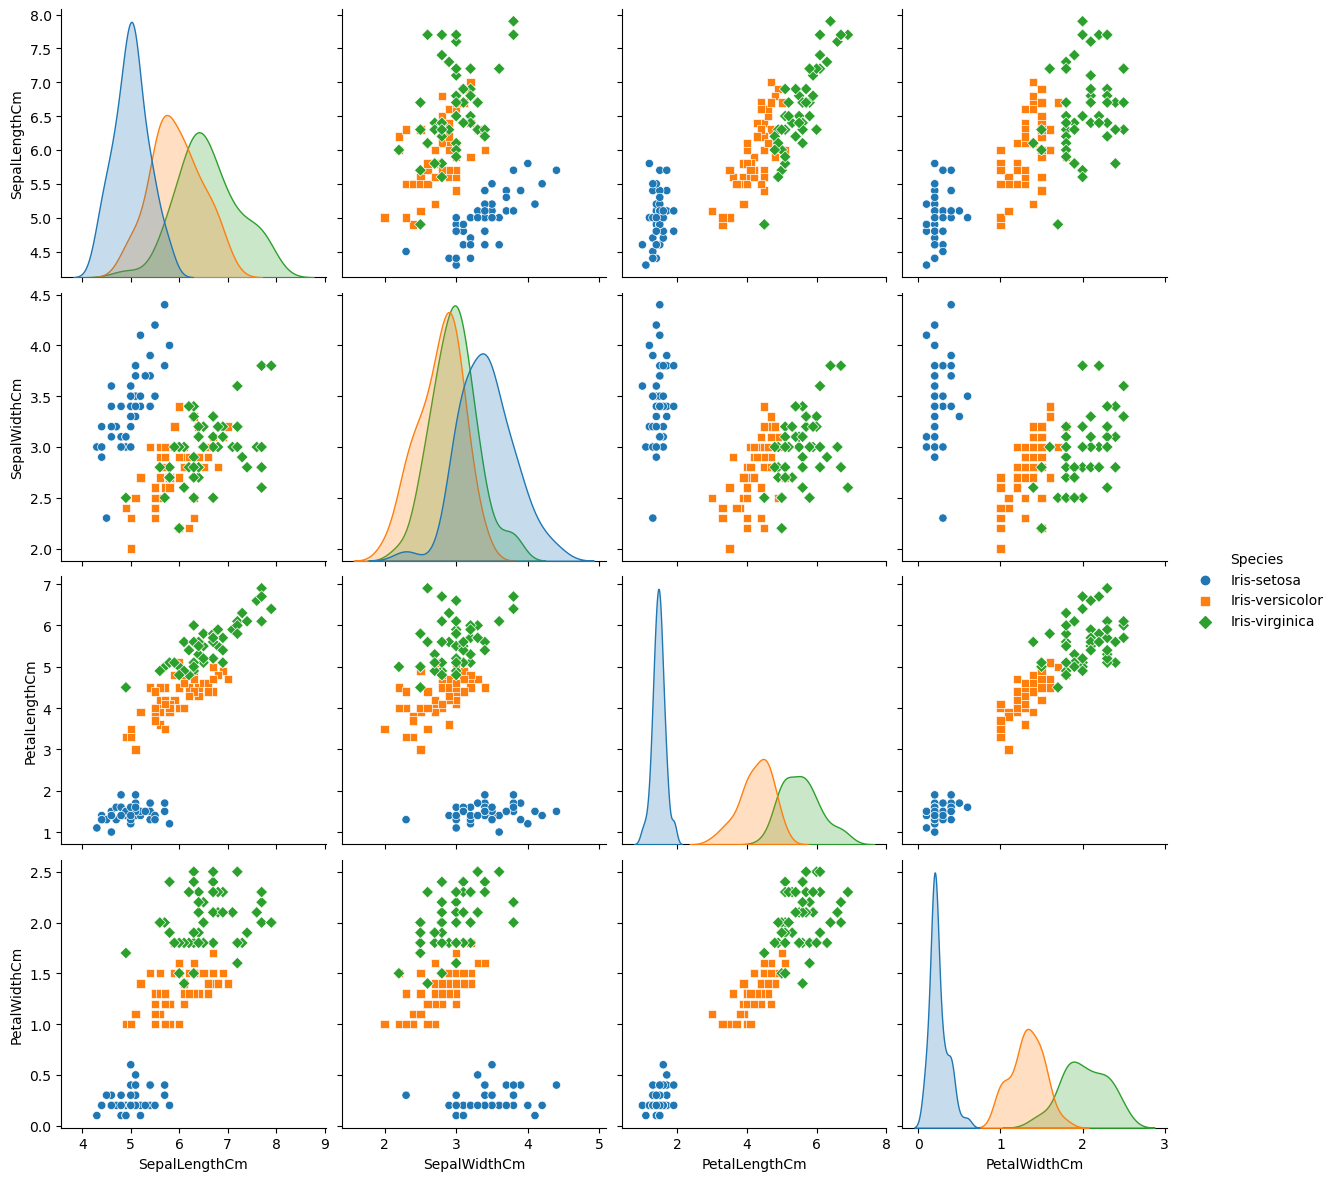

In [48]:
plt.figure()
sns.pairplot(df.drop("Id", axis=1), hue = "Species", height=3, markers=["o", "s", "D"])
plt.show()

**HeatMap:** ***Heatmaps are commonly used to visualize matrices or tables of data, where each cell's color intensity corresponds to the value of that cell.***

<AxesSubplot:>

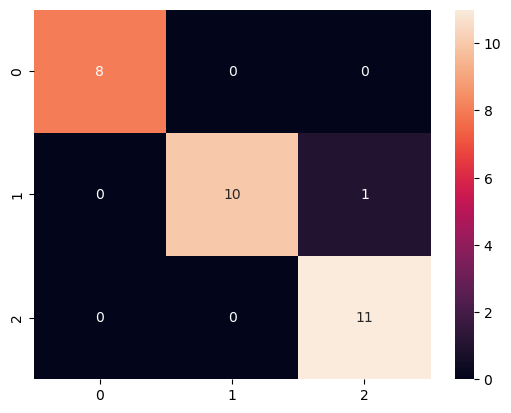

In [37]:
sns.heatmap(confusion_mat, annot=True)

**Confusion Matrix:** ***It is a table used to describe the performance of a classification model on a set of data for which the true values are known.*** 

In [38]:
confusion_mat = confusion_matrix(Y_test,y_pred)
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.91      0.95        11
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



**CROSS VALIDATION** **:** ***Cross-validation is a technique used in machine learning to assess the performance of a model and to reduce the risk of overfitting. It involves dividing the dataset into multiple subsets or "folds" to train and test the model multiple times. This helps provide a more accurate estimate of the model's performance on unseen data.***

In [63]:
X, y = datasets.load_iris(return_X_y=True)
SVM= SVC()
k_folds = KFold(n_splits = 10)
scores = cross_val_score(SVM, X, y, cv = k_folds)
print("Cross Validation Scores:\n",list(scores))
print("\nAverage CV Score:\n", scores.mean())

Cross Validation Scores:
 [1.0, 1.0, 1.0, 1.0, 0.8666666666666667, 0.8666666666666667, 1.0, 0.8666666666666667, 0.8, 0.9333333333333333]

Average CV Score:
 0.9333333333333333


**MODEL EVALUVATION** - ***SVM (SUPPORT VECTOR MACHINE) CLASSIFIER***



In [32]:
X = df.iloc[:, 1:5].values
y = df.iloc[:, 5].values
le = LabelEncoder()
y = le.fit_transform(y)


**The accuracy score:** ***is a common metric used to measure the performance of a classification model. It represents the proportion of correctly classified instances (both true positives and true negatives) out of the total number of instances in the dataset.***

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)
model1 = SVC()
model1.fit(X_train,Y_train)
y_pred = model1.predict(X_test)

print("Accuracy=",(accuracy_score(Y_test,y_pred)*100),"%")

Accuracy= 96.66666666666667 %


**An accuracy score of 96% indicates that a classification model is correctly predicting the class labels for a significant portion of the dataset.**